In [2]:
pip install fdtd


In [3]:

import fdtd
import time

In [48]:
fdtd.set_backend("torch")

In [69]:
grid=fdtd.Grid(
    shape=(100,100,1),
    grid_spacing= 1,
    permittivity= 1.0,
    permeability= 1.0,
    #courant_number: float = None,
)

In [70]:
grid[60:70, 60:70, 0] = fdtd.Object(permittivity=1.1**2, name="object1")

In [71]:
grid[30:40, 30:40, 0] = fdtd.Object(permittivity=1.5**2,name="object2")

In [67]:
grid[49:50, 49:51, 0]=fdtd.LineSource(period=1/3e8,name="source1")
fdtd.sources

<module 'fdtd.sources' from 'C:\\Users\\zwdzw\\anaconda3\\lib\\site-packages\\fdtd\\sources.py'>

In [72]:
grid[50, 50, 0]=fdtd.PointSource(period=1/3e8,name="source2")

In [40]:
# # x boundaries
# grid[0:10, :, :] = fdtd.PML(name="pml_xlow")
# grid[-10:, :, :] = fdtd.PML(name="pml_xhigh")

# # y boundaries
# grid[:, 0:10, :] = fdtd.PML(name="pml_ylow")
# grid[:, -10:, :] = fdtd.PML(name="pml_yhigh")

In [73]:
start_time = time.time()
grid.run(total_time=1000)
print("--- %s seconds ---" % (time.time() - start_time))

100%|██████████| 1000/1000 [00:00<00:00, 1476.79it/s]

--- 0.6781432628631592 seconds ---


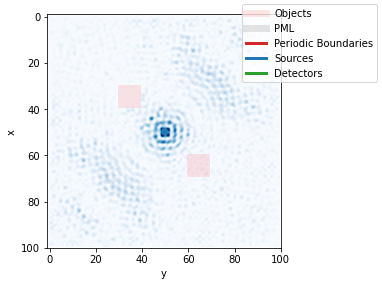

In [74]:
grid.visualize(z=0)

In [75]:
print(grid)


Grid(shape=(100,100,1), grid_spacing=1.00e+00, courant_number=0.70)

sources:
    PointSource(period=1, amplitude=1.0, phase_shift=0.0, name='source2')
        @ x=50, y=50, z=0

objects:
    Object(name='object1')
        @ x=60:70, y=60:70, z=0:1
    Object(name='object2')
        @ x=30:40, y=30:40, z=0:1



In [4]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import copy
import math
# pytorch imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

In [5]:
size=100
ez=np.zeros((size,size))
hx=np.zeros((size,size))
hy=np.zeros((size,size))
Eps=np.ones((size,size))

In [6]:
for i in range(30,40,1):
    for j in range(30,40,1):
        Eps[i][j]=1.1
for i in range(60,70,1):
    for j in range(60,70,1):
        Eps[i][j]=1.5

In [7]:

def fieldupdate3(T=10,size=100,E=ez,Hx=hx,Hy=hy,Eps=Eps):
    imp0=377
#     E_history=[]
#     Hx_history=[]
#     Hy_history=[]
#     test=[]
    for t in range(T):
        for i in range(size):
            for j in range(size-1):
                Hx[i][j]=Hx[i][j]+(E[i][j+1]-E[i][j])/imp0/2/Eps[i][j]

        for i in range(size-1):
            for j in range(size):
                
                Hy[i][j]=Hy[i][j]+(E[i+1][j]-E[i][j])/imp0/2
                
                
        for i in range(size-1):
            for j in range(size-1):
                E[i+1][j+1]=E[i+1][j+1]+(Hx[i+1][j+1]+Hy[i+1][j+1]-Hx[i+1][j]-Hy[i][j+1])*imp0/2
        #E[int(size/4)][int(size/4)]+=math.sin(0.1*t)
        E[int(size/2)][int(size/2)]+=math.sin(0.1*t)
        E[int(size/2)][int(size/2)+1]+=math.sin(0.1*t)
        #E[int(size/2)][int(size/2)]+=math.exp(-(t+1-0.3*size)*(t+1-0.3*size)/100)
#         test.append(E[int(0.5*size)])
#         E_history.append(E.copy())
#         Hx_history.append(Hx.copy())
#         Hy_history.append(Hy.copy())
#     with open("E field history.txt", 'w') as f:
#         for member in E_history:
#             f.write(str(member) + '\n')
#     with open("Hx field history.txt", 'w') as f:
#         for member in Hx_history:
#             f.write(str(member) + '\n')
#     with open("Hy field history.txt", 'w') as f:
#         for member in Hy_history:
#             f.write(str(member) + '\n')
#     E_history=np.array(E_history)
        
    return E


In [14]:
E=fieldupdate3(10,size,ez,hx,hy)
print(type(E_history))

E_new=E_history.copy().reshape(-1)
print(E_new.shape)

#print(test)

NameError: name 'E_history' is not defined

In [14]:
start_time = time.time()


E=fieldupdate3(10,size,ez,hx,hy,Eps)
print("--- %s seconds ---" % (time.time() - start_time))


--- 0.5081131458282471 seconds ---


In [52]:
print(E.shape)

(100, 100)


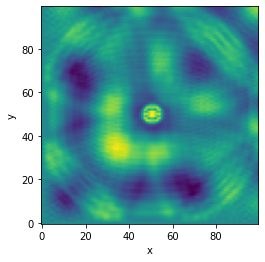

In [15]:

plt.xlabel('x')
plt.ylabel('y')
plt.imshow(E,origin='lower')